In [223]:
import pandas as pd
import numpy as np

In [224]:
dataset=pd.read_csv(r'Soil_to_Crop.csv')

In [225]:
dataset.isna()

,pH,EC,OC,Avail-P,Exch-K,Avail-Ca,Avail-Mg,Avail-S,Avail-Zn,Avail-B,Avail-Fe,Avail-Cu,Avail-Mn,Soil_type,Crop_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4084,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4085,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4086,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [226]:
dataset.dtypes

pH           float64
EC           float64
OC           float64
Avail-P      float64
Exch-K         int64
Avail-Ca       int64
Avail-Mg       int64
Avail-S      float64
Avail-Zn     float64
Avail-B      float64
Avail-Fe     float64
Avail-Cu     float64
Avail-Mn     float64
Soil_type      int64
Crop_type     object
dtype: object

In [227]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

print(X.shape)

print(y.shape)

(4088, 13)
(4088,)


In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [230]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2861, 13)
(1227, 13)
(2861,)
(1227,)


In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 71.71964140179298


C:\Users\babby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [233]:
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier(n_estimators = 100, random_state=0)

#Train model
random_forest.fit(X_train, y_train)

testlabel = random_forest.predict(X_test)
print(testlabel)

#Test model
#random_forest.fit(X_test, y_test)

print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(X_train, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(X_test, y_test)))

[1 4 4 ... 4 4 1]
The accuracy of the Random Forest classifier on training data is 1.00
The accuracy of the Random Forest classifier on test data is 0.76


In [234]:
model1 = LogisticRegression(random_state=1, multi_class='multinomial', penalty='none', solver='newton-cg', max_iter=1000, dual=False).fit(X_train_std, y_train)

y_pred = model1.predict(X_test_std)

In [34]:
print("Accuracy of Logistic Regression model is:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 71.47514262428687


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=500, max_depth=5, min_samples_leaf=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

print("Accuracy of Decison Tree Classifier model is:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Decison Tree Classifier model is: 70.6601466992665


In [21]:
# import XGBoost classifier
from xgboost import XGBClassifier

# import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score


# score XGBClassifier
cross_val_score(XGBClassifier(), X_train, y_train)


C:\Users\babby\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.7609075 , 0.76223776, 0.74475524, 0.76223776, 0.75      ])

C:\Users\babby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\babby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\babby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

LR: 0.693815 (0.022811)
RF: 0.769661 (0.031872)
KNN: 0.682636 (0.026107)


C:\Users\babby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\babby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: 0.667602 (0.031333)
NB: 0.524999 (0.031508)


C:\Users\babby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\babby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM: 0.688574 (0.028730)


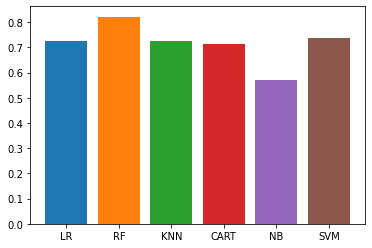

In [285]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    plt.bar(name,cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


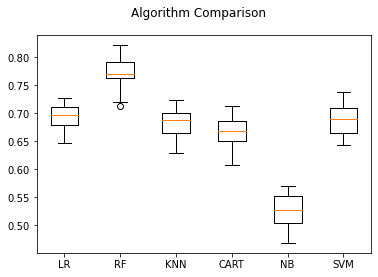

In [286]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Accuracy Comparison of ML Approaches

In [289]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
]

In [290]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 2)
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    
    
    

    row_index += 1
    
#MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

C:\Users\babby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\babby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
0,AdaBoostClassifier,0.66,0.67
1,BaggingClassifier,0.99,0.71
2,ExtraTreesClassifier,1.00,0.76
3,GradientBoostingClassifier,0.87,0.74
4,RandomForestClassifier,1.00,0.75
5,GaussianProcessClassifier,1.00,0.03
6,LogisticRegressionCV,0.73,0.71
7,PassiveAggressiveClassifier,0.51,0.53
8,RidgeClassifierCV,0.72,0.70
9,SGDClassifier,0.61,0.60


# Soil Type Prediction based on Soil Characteristics

In [291]:
# define one new instance
Xnew = [[8.05,0.13, 0.33, 3.08, 130, 2723, 322, 3.33, 0.32, 0.62, 6.56, 0.91, 8.96]]
# make a prediction
ynew = random_forest.predict(Xnew)
predicted = ynew
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[8.05, 0.13, 0.33, 3.08, 130, 2723, 322, 3.33, 0.32, 0.62, 6.56, 0.91, 8.96], Predicted=1


# Crop Prediction and Suggestions based on Soil Type

In [292]:
print("Soil_Type_Predicted=%s" % ynew)

for Soil_Type_Predicted in dataset['Soil_type']:
    break;
print(dataset['Crop_type'].drop_duplicates())
     

Soil_Type_Predicted=[1]
0                                             GROUNDNUT
3                                             SUNFLOWER
4                                                 PADDY
5                                                TAMATO
10                                               TOMATO
                             ...                       
3981                                            Topioca
3985                                  COTTON (Sample-1)
4075    Cashewnut, MANGO (Intercrop MAIZE And Seasamum)
4084                                       Cashew+MAIZE
4086                                            Brinjal
Name: Crop_type, Length: 141, dtype: object


# Suggested Crops

In [293]:
print("Soil_Type_Predicted=%s" % ynew)

for Soil_Type_Predicted in dataset['Soil_type']:
    break;
print(dataset['Crop_type'].unique())
     

Soil_Type_Predicted=[1]
['GROUNDNUT' 'SUNFLOWER' 'PADDY' 'TAMATO' 'TOMATO' 'Mulberry' 'Potatao'
 'SWEETCORN' 'POTATO' 'CHILLIESES' 'MULBARRY' 'VEGETABLES' 'HORSEGRAM'
 'BEANS' 'FLOWERS' 'CUCUMBER' 'KANDORA' 'MANGO' 'TURMERIC' 'YAM' 'BANANA'
 'COTTON' 'RIDGEGUARD' 'CHILLIES' 'chill' 'BLACKSOILGRAM' 'MAIZE' 'PULSE'
 'MAZI' 'Pigeonpea' 'JOWAR' 'Coriandam' 'Blacksoilgram' 'BENGALGRAM'
 'Redsoilgram' 'PADDY,JOWAR' 'DHANIYA' 'JONNA, BENGALGRAM' 'TOBBACO'
 'JONNA' 'Merappa ; BENGALGRAM' 'MOONGDAL' 'RICE' 'Cottan'
 'Ground Nat,Cottan' 'Cottan,Ground Nat' 'Ground Nat' 'Cottan,'
 'GROUNDNUT,Cottan' 'GROUNDNUT,COTTON' 'COTTON,GROUNDNUT' 'Citrus'
 'Green Gram' 'Cowpea' 'Tobacco' 'Prawns' 'PADDY/G.gram' 'Cashew'
 'BANANA/coconut' 'Coconut' 'PADDY Sugercane' 'Sugarcane '
 'PADDY/ Sugarcane' 'Sugarcane' 'suger cane ' 'Ragi/Niger'
 'MAIZE/PADDY/Rajma' 'MAIZE/Rajma' 'Rajma/MAIZE' 'PADDY/MAIZE/G.N'
 'PADDY/MAIZE' 'Sesumum' 'Sesamum' 'MANGO(Inter Crop Ragi)'
 'MANGO (Inter Crop Redsoil Gram And Ragi)' 'C